In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train'):
    for filename in filenames[:5]:  #dont want to list all
        print(os.path.join(dirname, filename))

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/4c3aa8ea6e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/18e7abc37e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/6a20935af5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/e642d9ea5f.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/a171e61840.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/4171ea3a0c.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/0f985a8440.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/5d320ade20.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/ae8c67086b.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/notype/1e8d55d48d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/notype/89e9ed3

In [6]:
##load 3 files
import pandas as pd
import os

TDCF_PATH = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"

# list files
tdcs_files = [f for f in os.listdir(TDCF_PATH) if f.endswith(".csv")]

# load files
sample_file1 = os.path.join(TDCF_PATH, tdcs_files[5])
df1 = pd.read_csv(sample_file1)
#print(df1.head(5))

sample_file2 = os.path.join(TDCF_PATH, tdcs_files[15])
df2 = pd.read_csv(sample_file2)
#print(df2.head(5))

sample_file3 = os.path.join(TDCF_PATH, tdcs_files[25])
df3 = pd.read_csv(sample_file3)
#print(df3.head(5))

In [7]:
def dataset_overview(df, name):
    print(f"===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nHead:\n", df.head(3))
    print("\n-------------------\n")

dataset_overview(df1, "Dataset 1")
dataset_overview(df2, "Dataset 2")
dataset_overview(df3, "Dataset 3")

===== Dataset 1 =====
Shape: (8183, 7)
Columns: ['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking']

Missing values:
 Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

Head:
    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.344086 -0.225303 -2.431794                0     0        0
1     1 -9.334921 -0.234452 -2.425015                0     0        0
2     2 -9.340987 -0.226840 -2.429140                0     0        0

-------------------

===== Dataset 2 =====
Shape: (9938, 7)
Columns: ['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking']

Missing values:
 Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64

Head:
    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -8.955

Here we check the shape, column names, and missing values in each dataset. This helps us understand the structure of the files, confirm that the expected signals and event labels are present before further analysis.

In [8]:
def signal_stats(df, name):
    sig_cols = [c for c in ['AccV','AccML','AccAP'] if c in df.columns]
    print(f"===== Signal Stats: {name} =====")
    print(df[sig_cols].describe())
    print("\n")

signal_stats(df1, "Dataset 1")
signal_stats(df2, "Dataset 2")
signal_stats(df3, "Dataset 3")

===== Signal Stats: Dataset 1 =====
              AccV        AccML        AccAP
count  8183.000000  8183.000000  8183.000000
mean     -9.466285    -0.328058     1.042473
std       0.589109     0.853004     1.764637
min     -13.363583    -5.147919    -3.103076
25%      -9.714356    -0.654836     0.645688
50%      -9.425090    -0.262503     1.581939
75%      -9.181331     0.123590     2.100066
max      -5.764722     2.728107     5.322573


===== Signal Stats: Dataset 2 =====
              AccV        AccML        AccAP
count  9938.000000  9938.000000  9938.000000
mean     -9.534513    -0.070438    -0.505302
std       0.820164     0.680315     1.487464
min     -14.193930    -2.589787    -6.515947
25%      -9.844360    -0.445212    -0.764294
50%      -9.545002    -0.016173    -0.139410
75%      -8.918930     0.250765     0.279927
max      -6.554793     2.761193     5.693978


===== Signal Stats: Dataset 3 =====
              AccV        AccML        AccAP
count  9857.000000  9857.000000  

We look at the basic statistics (mean, min, max, standard deviation) for the accelerometer signals. This tells us the range of motion captured and whether the values are consistent across the datasets. For example, higher standard deviation usually means more intense or irregular movement.

In [9]:
def event_summary(df, name):
    events = [c for c in ['Turn','Walking','StartHesitation'] if c in df.columns]
    counts = {ev: df[ev].sum() for ev in events}
    print(f"===== Event Summary: {name} =====")
    print(counts, "\n")

event_summary(df1, "Dataset 1")
event_summary(df2, "Dataset 2")
event_summary(df3, "Dataset 3")


===== Event Summary: Dataset 1 =====
{'Turn': 312, 'Walking': 0, 'StartHesitation': 0} 

===== Event Summary: Dataset 2 =====
{'Turn': 3599, 'Walking': 553, 'StartHesitation': 98} 

===== Event Summary: Dataset 3 =====
{'Turn': 182, 'Walking': 0, 'StartHesitation': 0} 



This summary counts how many times each type of event occurs (Turn, Walking, Start Hesitation). It helps us see what kind of movements dominate each dataset and ensures that all event labels are being captured.

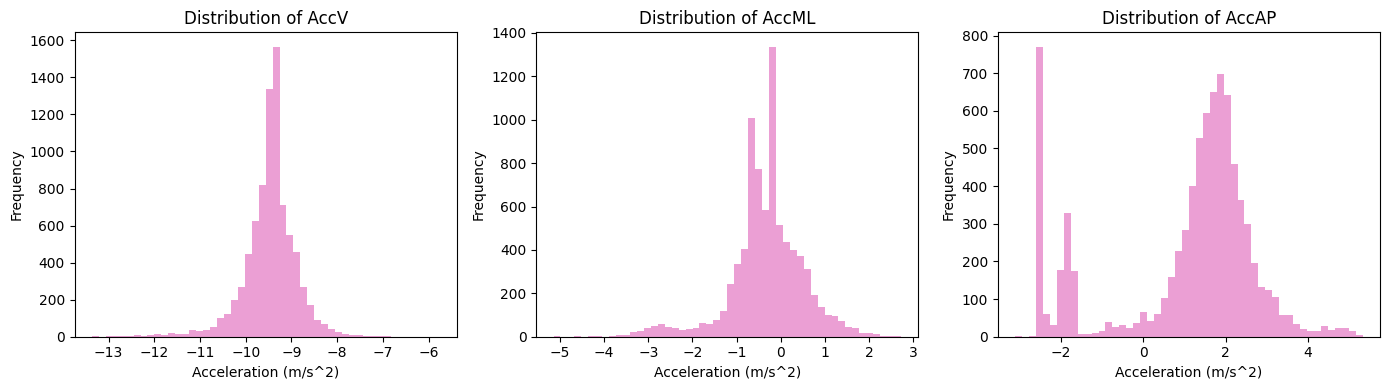

In [12]:
import matplotlib.pyplot as plt
# histograms of each accelerometer axis to see distribution of sensor readings over all samples
plt.figure(figsize=(14,4))

for i, col in enumerate(["AccV", "AccML", "AccAP"], 1):
    plt.subplot(1, 3, i)
    plt.hist(df1[col], bins=50, alpha=0.7, color='tab:pink')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Acceleration (m/s^2)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


This visualization helps understand the typical ranges and spread of accelerations along each axis, useful for feature scaling insights.

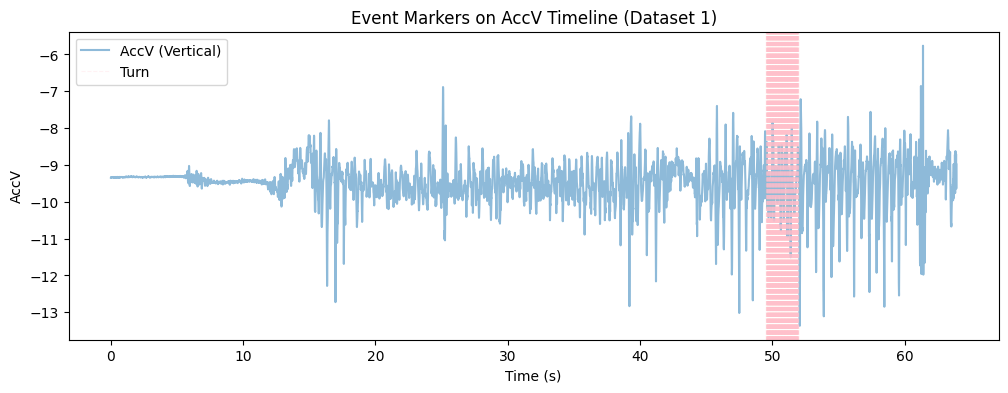

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


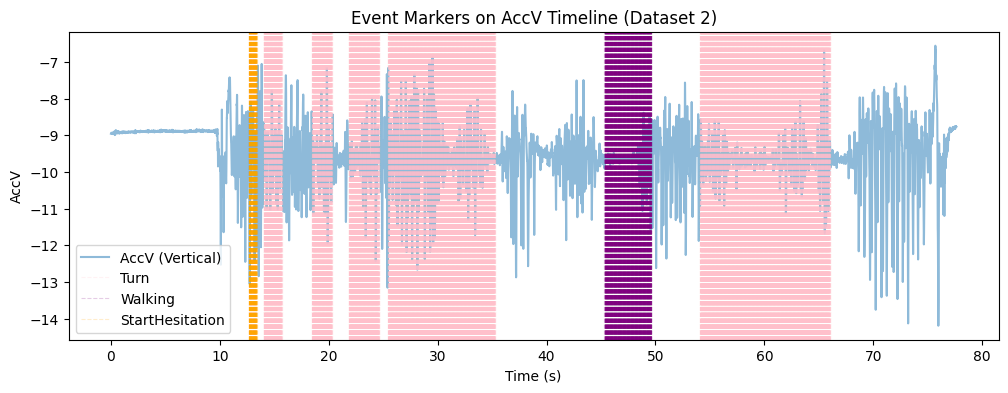

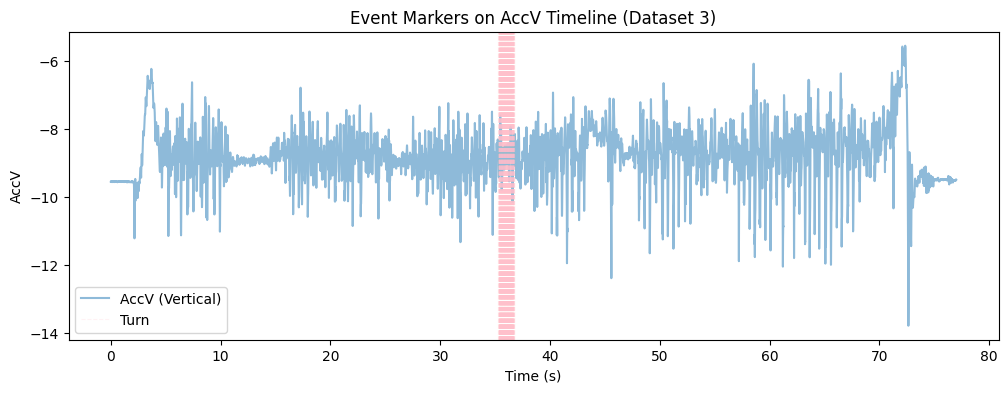

In [13]:
def plot_event_markers(df, title):
    time = df['Time'] / 128.0  # convert to seconds
    plt.figure(figsize=(12,4))

    #  vertical acceleration signal
    plt.plot(time, df['AccV'], label="AccV (Vertical)", alpha=0.5)

    colors = {'Turn':'pink','Walking':'purple','StartHesitation':'orange'}

    # vertical lines to show each event occurrence
    for event, color in colors.items():
        if event in df.columns:
            event_times = time[df[event]==1]
            first = True
            for t in event_times:
                plt.axvline(x=t, color=color, alpha=0.2, linestyle='--', linewidth=0.8,
                            label=event if first else None)
                first = False

    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("AccV")
    plt.legend()
    plt.show()

plot_event_markers(df1, "Event Markers on AccV Timeline (Dataset 1)")
plot_event_markers(df2, "Event Markers on AccV Timeline (Dataset 2)")
plot_event_markers(df3, "Event Markers on AccV Timeline (Dataset 3)")


**Analysis for Dataset 1 (Event Markers on AccV Timeline)**

In Dataset 1, we only see Turn events, marked in pink. The vertical acceleration signal (AccV) stays fairly steady most of the time, but when a Turn occurs, we notice a clear disturbance in the signal. This suggests that turning introduces noticeable changes in vertical motion, which the markers help align precisely with the raw signal.

**Analysis for Dataset 2 (Event Markers on AccV Timeline)**

Dataset 2 contains a mix of Turn (pink), Walking (purple), and Start Hesitation (orange) events. The markers show frequent Walking intervals, which appear as rhythmic fluctuations in the signal. Turns are shorter and more abrupt, while hesitation is brief but visible as a pause or irregularity. The combination of events makes this dataset richer and shows how different types of movements overlap with accelerometer variations.

**Analysis for Dataset 3 (Event Markers on AccV Timeline)**

Dataset 3 again highlights Turn events, with markers showing when these occur. Compared to Dataset 1, the vertical acceleration shows more variability across the timeline, with multiple noisy regions and a sudden change near the end. The markers help us identify exactly where turns are happening within this noisier context, making it easier to separate structured movement from random fluctuations.

In [14]:
def event_durations(df, name):
    time = df['Time'] / 128.0
    results = {}
    
    for event in ['Turn','Walking','StartHesitation']:
        if event in df.columns:
            starts = df.index[(df[event].diff()==1)]
            ends   = df.index[(df[event].diff()==-1)]
            
            # Handle if an event continues till the end
            if len(ends) < len(starts):
                ends = ends.append(pd.Index([df.index[-1]]))
            
            durations = (time.iloc[ends].values - time.iloc[starts].values) if len(starts)>0 else []
            results[event] = durations
    
    print(f"===== Event Durations (in sec): {name} =====")
    for ev, dur in results.items():
        print(ev, ":", np.round(dur,2))
    print("\n")

event_durations(df1, "Dataset 1")
event_durations(df2, "Dataset 2")
event_durations(df3, "Dataset 3")


===== Event Durations (in sec): Dataset 1 =====
Turn : [2.44]
Walking : []
StartHesitation : []


===== Event Durations (in sec): Dataset 2 =====
Turn : [ 1.68  1.84  2.8   9.84 11.96]
Walking : [4.32]
StartHesitation : [0.77]


===== Event Durations (in sec): Dataset 3 =====
Turn : [1.42]
Walking : []
StartHesitation : []





**Dataset 1**
In Dataset 1, only a single **Turn** event is detected, lasting about **2.4 seconds**.  
No Walking or Start Hesitation events appear in this file, confirming that the dataset is focused on turning movements only.  

**Dataset 2**
Dataset 2 shows multiple events:  
- Several **Turn** events ranging from short ones (~**1.7 seconds**) to longer ones (almost **12 seconds**).  
- One **Walking** segment lasting around **4.3 seconds**.  
- A brief **Start Hesitation** of about **0.8 seconds**.  

This dataset is more diverse and provides a good mix of event types, making it useful for studying how different movements vary in length.  

**Dataset 3**
In Dataset 3, we again see only **Turn** events, with one lasting about **1.4 seconds**.  
Similar to Dataset 1, there are no Walking or Start Hesitation events here, showing that this file also captures primarily short turning actions.  


In [18]:
import numpy as np

# combine all three dataframes for a better sample of statistics 
all_data = pd.concat([df1, df2, df3], ignore_index=True)

# 1. calculate the Vector Magnitude (VM) ---
all_data['vm'] = np.sqrt(
    all_data['AccV']**2 + all_data['AccML']**2 + all_data['AccAP']**2
)

# 2. filter data for fog events 
if 'StartHesitation' in all_data.columns:
    fog_vm = all_data[all_data['StartHesitation'] == 1]['vm']
    
    if not fog_vm.empty:
        # --- 3. calculate a statistical threshold from fog events ---
        mean_vm_fog = fog_vm.mean()
        std_vm_fog = fog_vm.std()
        
        vm_threshold = mean_vm_fog + std_vm_fog
        
        print(f"\ntime-domain threshold analysis:")
        print(f"  mean vector magnitude during fog: {mean_vm_fog:.3f}")
        print(f"  stddev vector magnitude during fog: {std_vm_fog:.3f}")
        print(f"  suggested vm threshold (mean + 1*stddev): {vm_threshold:.3f} m/s^2")
    else:
        print("\nno 'StartHesitation' (fog) events found in the combined sample for threshold calculation.")
else:
    print("\n'StartHesitation' column not found for fog threshold calculation.")


time-domain threshold analysis:
  mean vector magnitude during fog: 9.953
  stddev vector magnitude during fog: 1.266
  suggested vm threshold (mean + 1*stddev): 11.219 m/s^2


This cell combines three datasets to enlarge the sample, computes each row’s acceleration vector magnitude \(vm=\sqrt{AccV^2+AccML^2+AccAP^2}\), and derives a data-driven threshold for “fog” (`StartHesitation == 1`) events. For the fog subset, it calculates the mean and standard deviation of \(vm\) and sets a simple decision boundary at **mean + 1·std**. On our data, the fog mean is **9.953 m/s²**, the std is **1.266 m/s²**, yielding a suggested threshold of **11.219 m/s²**. The code also handles missing labels or empty fog subsets with clear messages. For production, consider dropping NaNs, parameterizing the multiplier \(k\), or using robust/percentile-based thresholds to mitigate skew, and persist the resulting threshold rather than only printing it.


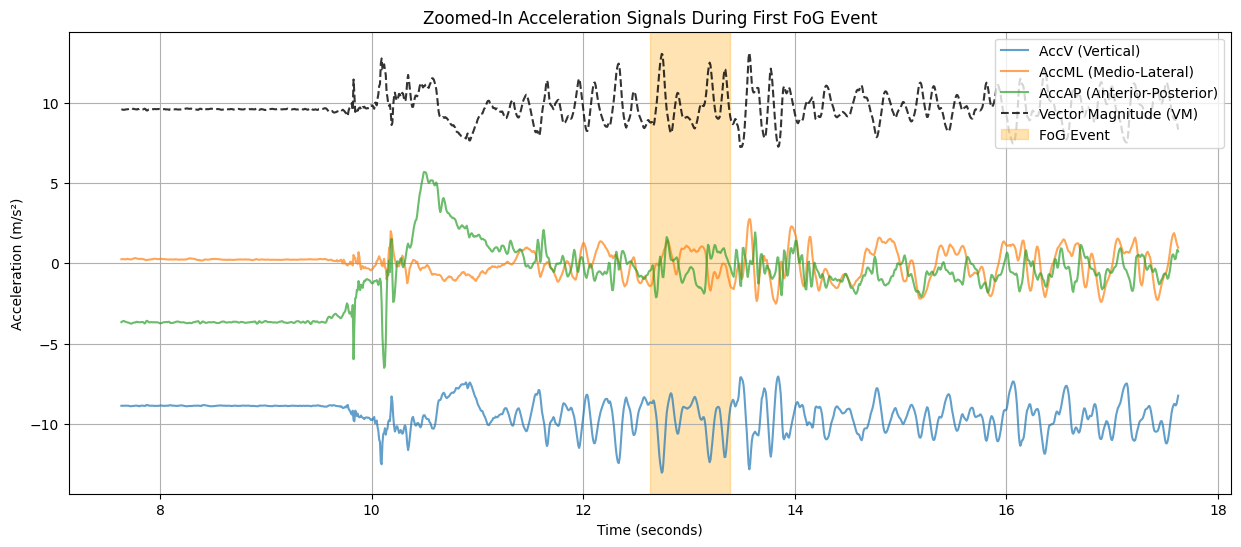

In [19]:
import matplotlib.pyplot as plt

# find the start and end time of the first FoG event in the combined data
fog_indices = all_data[all_data['StartHesitation'] == 1].index

if not fog_indices.empty:
    first_fog_start_index = fog_indices[0]
    
    # find a window to visualize
    # The data is sampled at 128 Hz, so 1280 steps is 10 seconds.
    window_size_steps = 128 * 10 
    
    start_plot = max(0, first_fog_start_index - window_size_steps // 2)
    end_plot = min(len(all_data), first_fog_start_index + window_size_steps // 2)
    
    zoom_df = all_data.iloc[start_plot:end_plot].copy()
    
    # calc time in seconds
    zoom_df['Time_s'] = zoom_df['Time'] / 128.0

    # plot
    plt.figure(figsize=(15, 6))
    plt.plot(zoom_df['Time_s'], zoom_df['AccV'], label='AccV (Vertical)', alpha=0.7)
    plt.plot(zoom_df['Time_s'], zoom_df['AccML'], label='AccML (Medio-Lateral)', alpha=0.7)
    plt.plot(zoom_df['Time_s'], zoom_df['AccAP'], label='AccAP (Anterior-Posterior)', alpha=0.7)
    plt.plot(zoom_df['Time_s'], zoom_df['vm'], label='Vector Magnitude (VM)', color='k', linestyle='--', alpha=0.8)

    # highlight the FoG period
    fog_period = zoom_df[zoom_df['StartHesitation'] == 1]
    if not fog_period.empty:
        plt.axvspan(fog_period['Time_s'].min(), fog_period['Time_s'].max(), color='orange', alpha=0.3, label='FoG Event')
        
    plt.title('Zoomed-In Acceleration Signals During First FoG Event')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s²)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Cannot plot: No 'StartHesitation' events found in the combined sample.")

This cell locates the **first FoG (StartHesitation == 1) event** in the combined dataset, extracts a **10-second window** around it (sampling = **128 Hz**, so 1,280 samples), converts the x-axis to **seconds**, and plots the three acceleration components (**AccV, AccML, AccAP**) plus the **vector magnitude (VM)**. The FoG interval within the window is emphasized with an **orange shaded band** using the event’s min/max timestamps. The figure provides an intuitive view of how each axis and the VM behave as the episode begins and ends, serving as a quick visual sanity check for downstream thresholding or feature design.
